In [18]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [2]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
vehicles = pd.read_csv("vehicle.csv")

In [5]:
cols = vehicles.columns
cols = cols.drop('class')

In [6]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
#there seems to be missing values in the following columns
# 1) circularity - 5 records missing
# 2) distance_circularity - 4 records missing
# 3) radius_ratio - 6 records missing
# 4) pr.axis_aspect_ratio - 2 records missing

#scaled_variance                843 non-null float64
#scaled_variance.1              844 non-null float64
#scaled_radius_of_gyration      844 non-null float64
#scaled_radius_of_gyration.1    842 non-null float64
#skewness_about                 840 non-null float64
#skewness_about.1               845 non-null float64
#skewness_about.2 
#scatter_ratio                  845 non-null float64
#elongatedness                  845 non-null float64
#pr.axis_rectangularity 

In [8]:
vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [31]:
vehicle_without_class = vehicles.drop(columns=['class'])
Y = vehicles['class']

In [111]:
from sklearn.preprocessing import LabelEncoder

In [113]:
encoder = LabelEncoder()
Y=encoder.fit_transform(Y)

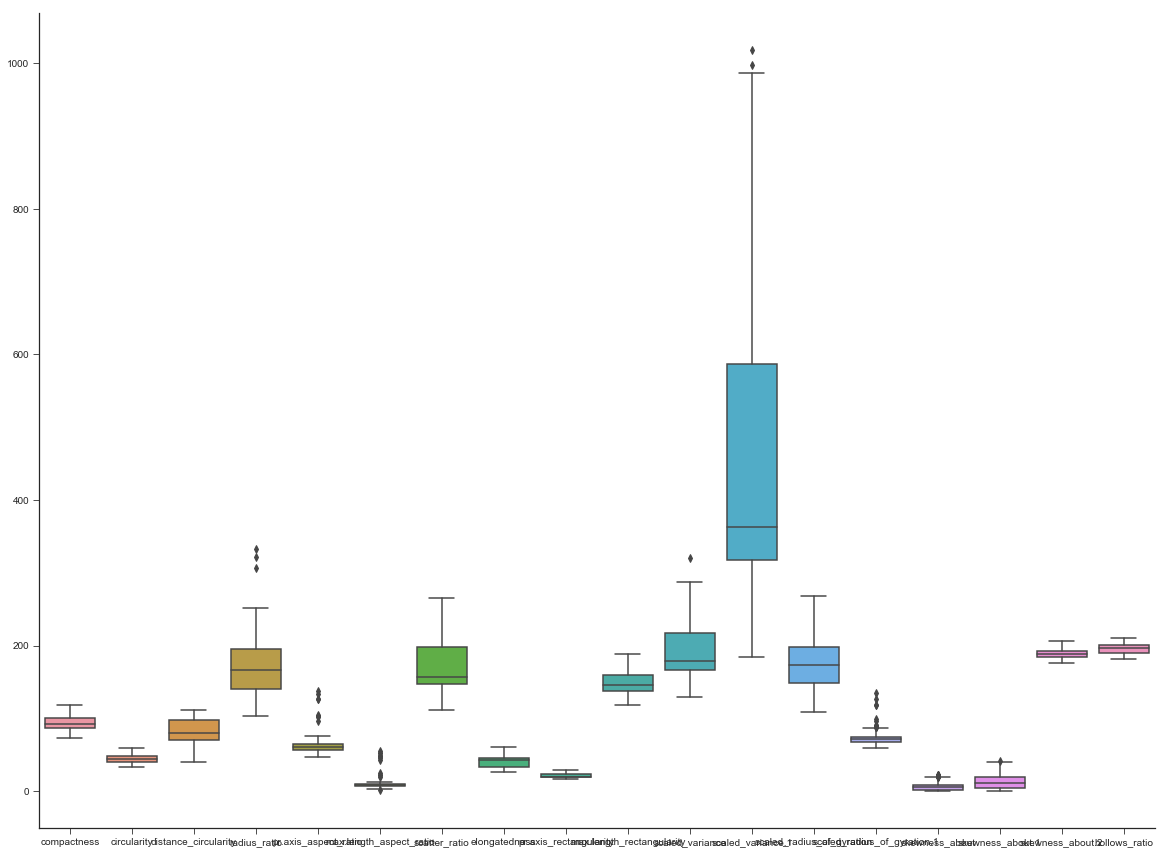

In [32]:

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.boxplot(data=vehicle_without_class, ax=ax)    
sns.despine()

In [33]:
corr = vehicle_without_class.corr()

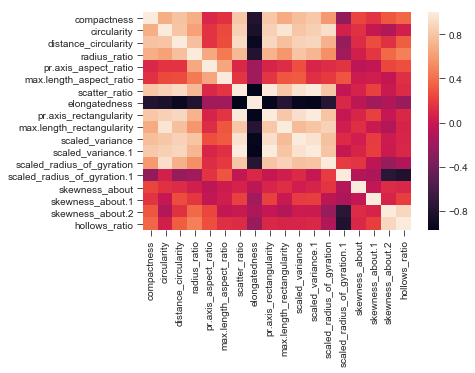

In [14]:
sns.heatmap(corr)

In [15]:
print(set(vehicles.iloc[:,-1]))


{'van', 'car', 'bus'}


In [16]:
print(len(vehicle_without_class.columns))

18


In [17]:
vehicles.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [34]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [35]:
imp.fit(vehicle_without_class)
transform = imp.transform(vehicle_without_class)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [37]:
print(transform)
transform = pd.DataFrame(data=transform)

[[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]


In [48]:
print(transform.shape)

(846, 18)


In [ ]:
#there are Nan values in the data fram, replacing hte 

# there are three class variables in the column class and for prediction purpose it is mentioned in the question that
# incoming vehicle should be predicted to either car, bus or van
# we need to reduce the number of variables count from 18 to possibly less count using dimensionality reduction technique

In [40]:
from sklearn.decomposition import PCA

In [74]:
pca_1 = PCA(0.95)

In [75]:
pca_1_data = pca_1.fit_transform(transform)

In [76]:
pca = PCA(n_components=8)
pca.fit(transform)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
X_pca = pca.transform(transform)

In [78]:
print(cols)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')


In [79]:
X_pca.shape

(846, 8)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=542)
y_test = encoder.fit_transform(y_test)
y_train = encoder.fit_transform(y_train)

In [127]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [128]:
model.score(X_test, y_test)

0.6653543307086615

In [129]:
pca.components_

array([[ 3.60471829e-02,  2.78416913e-02,  7.53126652e-02,
         1.31532530e-01,  4.71828131e-03,  3.98208081e-03,
         1.76880624e-01, -4.01422254e-02,  1.37184017e-02,
         6.25157100e-02,  1.60052966e-01,  9.44697471e-01,
         1.40485722e-01, -5.67733845e-04,  2.08245628e-03,
         9.44378632e-03,  3.69669682e-04,  4.41277792e-03],
       [ 5.18548219e-02, -2.18352925e-02,  1.09327072e-01,
         8.56561998e-01,  2.42584119e-01,  8.19058775e-02,
         7.62614537e-03, -3.85807591e-02, -2.69334189e-03,
        -6.02106375e-02,  1.65003903e-01, -1.20954202e-01,
        -2.58190028e-01, -9.76128121e-02, -8.29962275e-03,
         4.90734123e-02,  1.53529450e-01,  1.90666362e-01],
       [-3.47094024e-02,  1.22648333e-01,  2.09786621e-02,
         2.26480425e-01,  1.48917356e-01,  7.89989461e-02,
        -2.24263564e-03, -1.10868363e-02, -1.08946929e-03,
         2.66691009e-01,  1.33175384e-01, -2.00805539e-01,
         8.47556483e-01,  1.24257045e-01,  3.27640638e

In [130]:
np.cumsum(pca.explained_variance_ratio_)

array([0.95852718, 0.97671975, 0.98884279, 0.99280802, 0.99483552,
       0.99617129, 0.99735877, 0.99814313])

In [131]:
from sklearn.svm import SVC

In [138]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(254,)
(592,)
(254, 8)
(592, 8)


In [132]:
clf = SVC(kernel='rbf', C = .5)

In [133]:
clf.fit(X_train,y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
y_predict_1 =clf.predict(X_test)

In [135]:
print(y_predict_1.shape)
print(X_test.shape)

(254,)
(254, 8)


In [139]:
print(clf.score(y_predict_1,y_test))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.